In [1]:
import sys
import numpy as np
from pathlib import Path
from pyPolCal.csv_tools import write_fits_info_to_csv,read_csv,read_csv_physical_model_all_bins
from pyPolCal.fitting import *
from pyPolCal.utils import *
from pyPolCal.plotting import plot_data_and_model
from pyMuellerMat.physical_models.charis_physical_models import *
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import pandas as pd
# Plot settings that I like
plt.rcParams.update({
    #"text.usetex": True,
    #"font.family": "serif",
   # "font.serif": ["Palatino"],
    "font.size": 16,
   # "text.latex.preamble": r"\usepackage{amsmath}\usepackage{mathpazo}"
})
from pyPolCal.constants import wavelength_bins


/home/thomasmc/miniconda3/envs/charisenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Step 1: Write FITS Info to CSV

This CSV writer will organize all relevant header information. Some header information is excluded from the extracted cubes but exists in the raw files. This function will match the info from raw headers by matching tags in the filenames. The CHARIS DPP rewrites these tags, so if you used the DPP at any point you will need to retitle all the frames to their original titles (there is a function in csv_tools.py to do this).

In [3]:
# Get paths to both processed and raw data 
# Make sure these directories have cubes with corresonding numbers
cube_dir = '/home/thomasmc/nbs_in/unpol/cubes'
raw_dir = '/home/thomasmc/nbs_in/unpol/raw'
csv_dir = '/home/thomasmc/nbs_in/unpol/csvs'

# Write all bins to csvs
for bin in range(0,22):
   csv_filepath = f'/home/thomasmc/nbs_in/unpol/csvs/bin{bin}.csv'
   write_fits_info_to_csv(cube_dir, raw_dir, csv_filepath,bin)



CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin0.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin1.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin2.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin3.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin4.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin5.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin6.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin7.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin8.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin9.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin10.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin11.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin12.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin13.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin14.csv
CSV file written to /home/thomasmc/nbs_in/unpol/csvs/bin15.csv
CS

/home/thomasmc/miniconda3/envs/charisenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1403e-03                                    9.45e-02    
       1              2         5.7086e-04      5.69e-04       1.19e-02       1.11e-03    
       2              3         5.7078e-04      8.09e-08       1.44e-04       1.62e-07    
       3              4         5.7078e-04      1.71e-15       2.09e-08       7.93e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.1403e-03, final cost 5.7078e-04, first-order optimality 7.93e-11.
     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 8.242e-05  6.032e-03 ... -6.214e-04  7.017e-03]
           x: [ 1.206e-02]
        cost: 0.0005707840070802774
         jac: [[ 4.245e-01]
               [-6.933e-02]
               ...
               [-2.542e-01]
               [ 7.908e-02]]
        grad: [-8.028e-11]
  optimality: 7.931

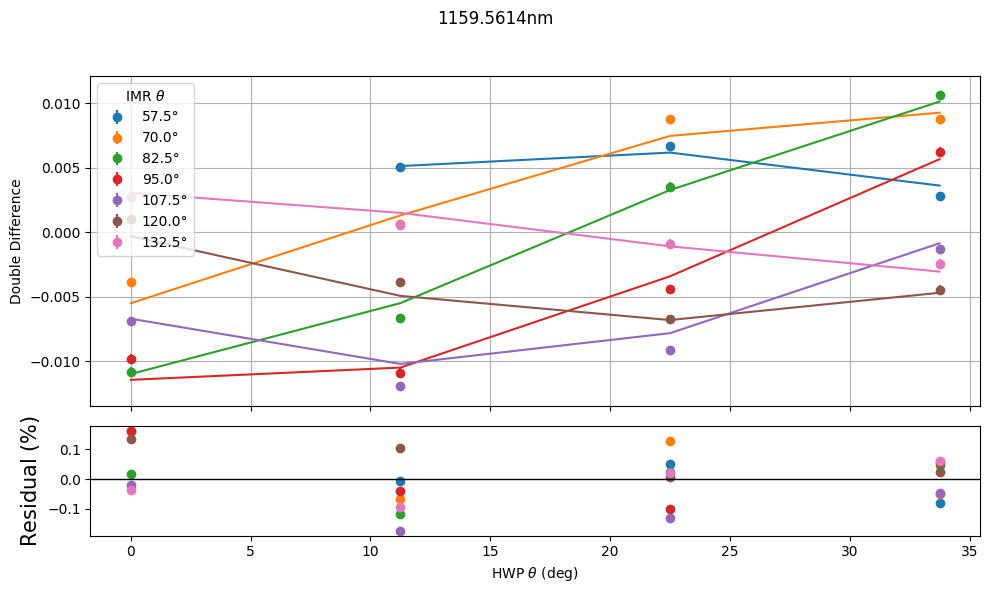

Updated Mueller Matrix:
[[ 0.50200938 -0.17212167  0.02806203  0.47074417]
 [-0.50200938  0.17212167 -0.02806203 -0.47074417]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.17452426767319484 0.16289284627808387
s_res: 0.09042154123888953
Error: [0.00165824]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.3136e-03                                    1.07e-01    
       1              2         2.6816e-03      6.32e-04       1.17e-02       1.23e-03    
       2              3         2.6815e-03      8.69e-08       1.39e-04       1.74e-07    
       3              4         2.6815e-03      1.73e-15       1.95e-08       2.96e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 3.3136e-03, final cost 2.6815e-03, first-order optimality 2.96e-10.
     message: `gtol` termination condition is satisfied.

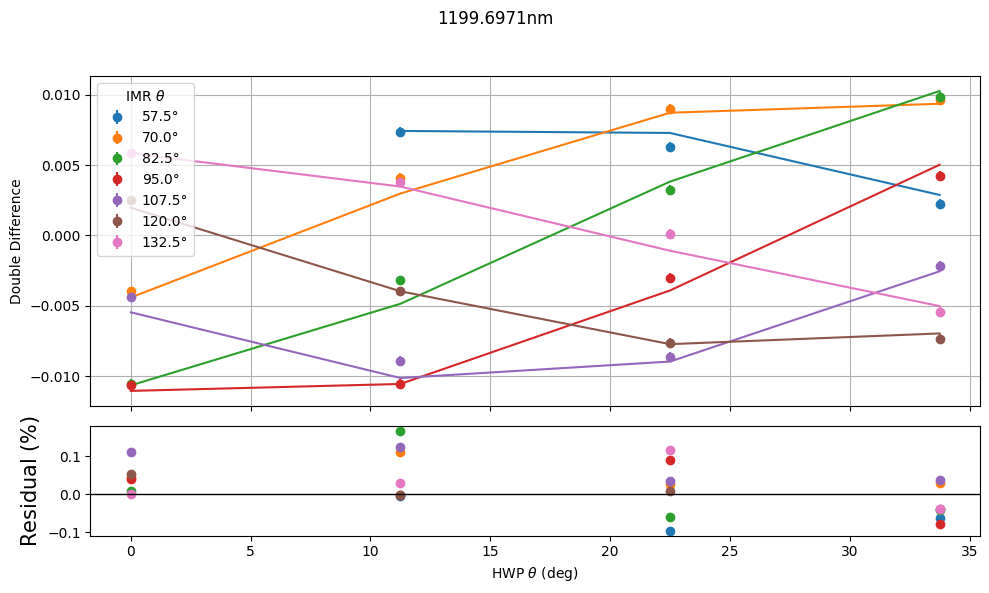

Updated Mueller Matrix:
[[ 0.50295373 -0.25258443  0.11650844  0.41427245]
 [-0.49899334  0.25451836 -0.11744231 -0.41759998]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.09656500369047605 0.16709456445526133
s_res: 0.07055654439089205
Error: [0.003356]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.9724e-03                                    1.21e-01    
       1              2         1.2567e-03      7.16e-04       1.17e-02       1.40e-03    
       2              3         1.2566e-03      9.73e-08       1.38e-04       1.95e-07    
       3              4         1.2566e-03      1.89e-15       1.92e-08       9.84e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.9724e-03, final cost 1.2566e-03, first-order optimality 9.84e-11.
     message: `gtol` termination condition is satisfied.
 

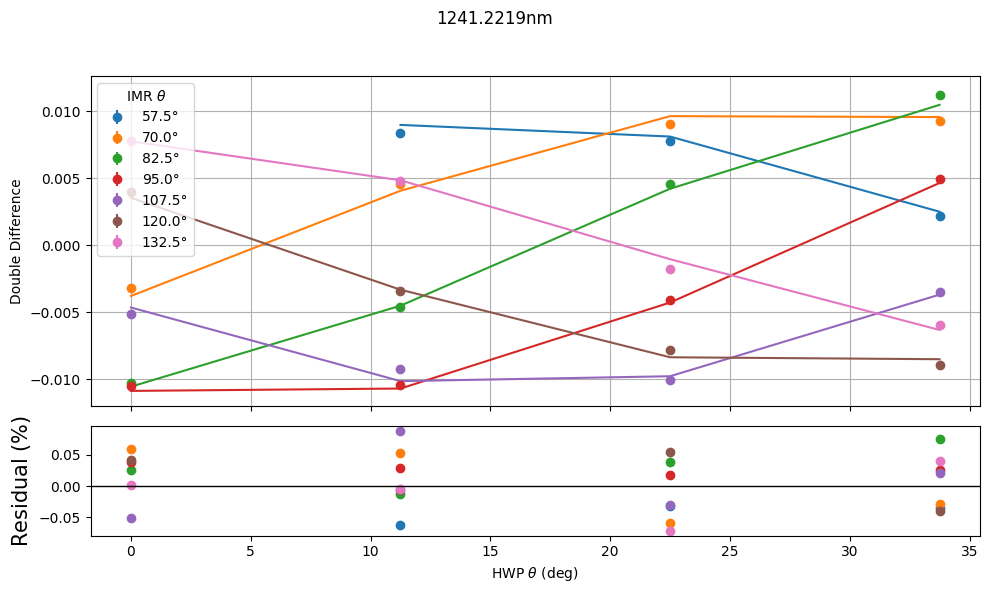

Updated Mueller Matrix:
[[ 0.50357828 -0.3055346   0.17980155  0.35436625]
 [-0.50125365  0.30691676 -0.18064636 -0.35603353]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.07137399812565429 0.08852047374926508
s_res: 0.04513824121493364
Error: [0.00214737]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.3734e-03                                    1.30e-01    
       1              2         1.6347e-03      7.39e-04       1.12e-02       1.44e-03    
       2              3         1.6346e-03      9.33e-08       1.28e-04       1.87e-07    
       3              4         1.6346e-03      1.56e-15       1.65e-08       2.00e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 2.3734e-03, final cost 1.6346e-03, first-order optimality 2.00e-10.
     message: `gtol` termination condition is satisfied.

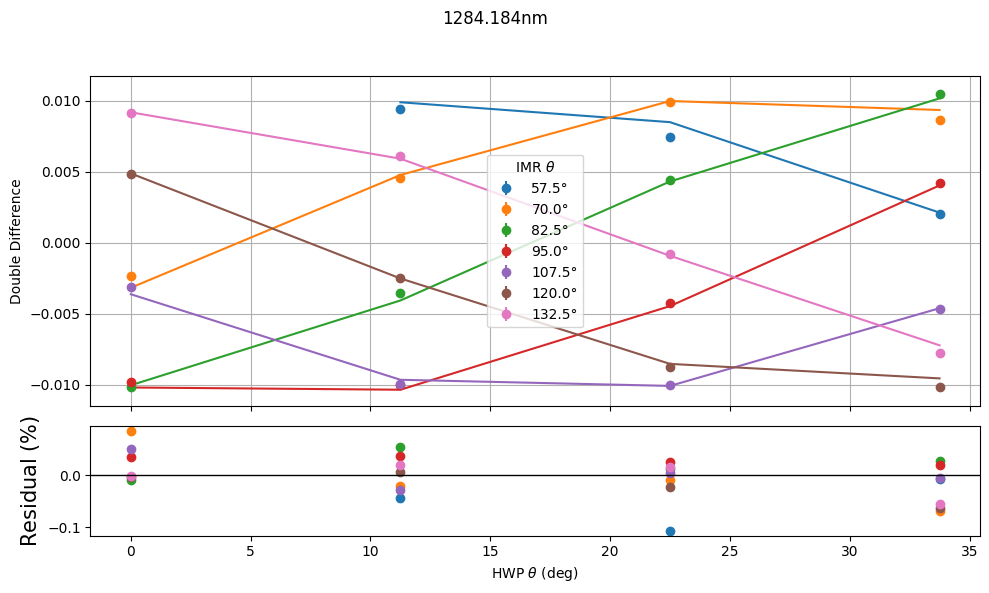

Updated Mueller Matrix:
[[ 0.5039187  -0.34551766  0.24378335  0.25696008]
 [-0.49481377  0.35176819 -0.24833768 -0.26176516]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.1068301831531675 0.08492820664810691
s_res: 0.04169209465115862
Error: [0.00232215]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.3729e-03                                    1.36e-01    
       1              2         3.6343e-03      7.39e-04       1.08e-02       1.45e-03    
       2              3         3.6343e-03      8.57e-08       1.17e-04       1.71e-07    
       3              4         3.6343e-03      1.20e-15       1.39e-08       6.59e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 4.3729e-03, final cost 3.6343e-03, first-order optimality 6.59e-11.
     message: `gtol` termination condition is satisfied.


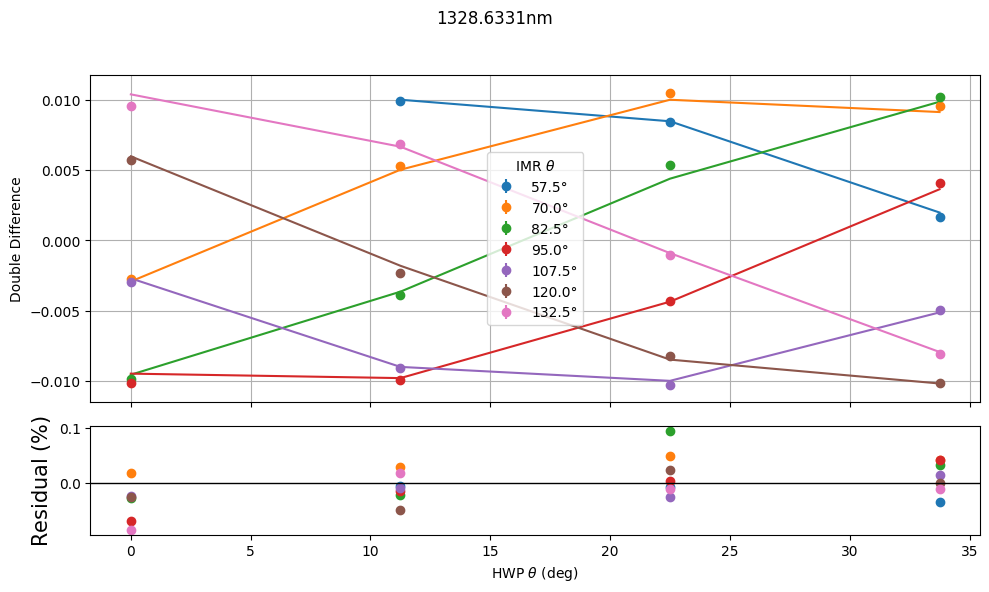

Updated Mueller Matrix:
[[ 0.503878   -0.35503682  0.32474419 -0.08734246]
 [-0.48901721  0.36567153 -0.33476759  0.09004016]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.08547915213389967 0.09496010721458692
s_res: 0.03804743401101556
Error: [0.0033171]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.4906e-03                                    1.29e-01    
       1              2         3.8029e-03      6.88e-04       1.05e-02       1.35e-03    
       2              3         3.8028e-03      7.61e-08       1.12e-04       1.53e-07    
       3              4         3.8028e-03      9.79e-16       1.27e-08       7.25e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 4.4906e-03, final cost 3.8028e-03, first-order optimality 7.25e-10.
     message: `gtol` termination condition is satisfied.


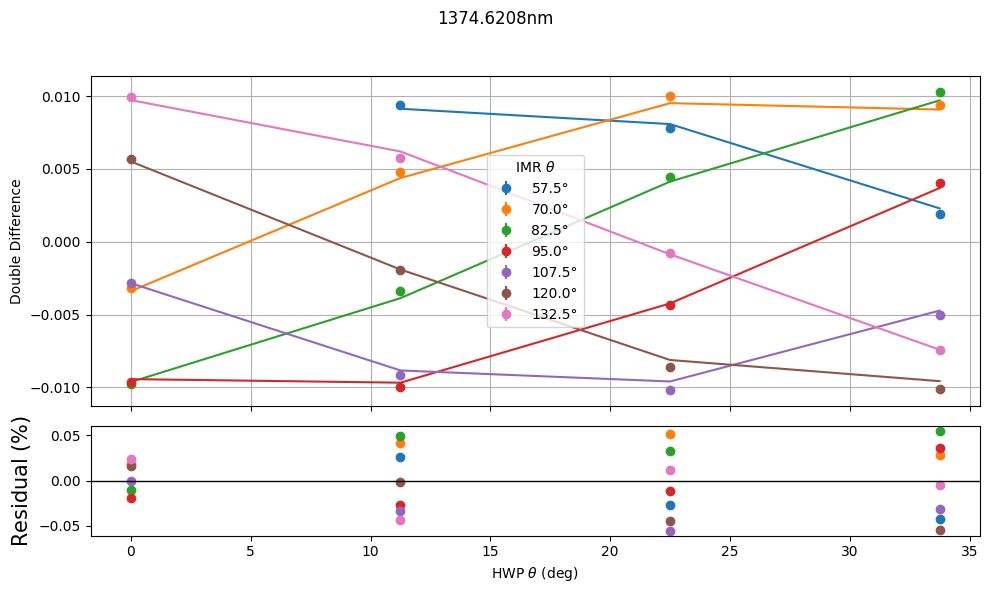

Updated Mueller Matrix:
[[ 0.50347795 -0.32595818  0.3227941  -0.19575794]
 [-0.49876411  0.32898123 -0.32588611  0.19763435]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.055335211565283315 0.05497981244310546
s_res: 0.03441334712423466
Error: [0.003433]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2778e-03                                    1.14e-01    
       1              2         1.6776e-03      6.00e-04       1.04e-02       1.18e-03    
       2              3         1.6775e-03      6.46e-08       1.09e-04       1.29e-07    
       3              4         1.6775e-03      7.80e-16       1.20e-08       1.94e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 2.2778e-03, final cost 1.6775e-03, first-order optimality 1.94e-10.
     message: `gtol` termination condition is satisfied.


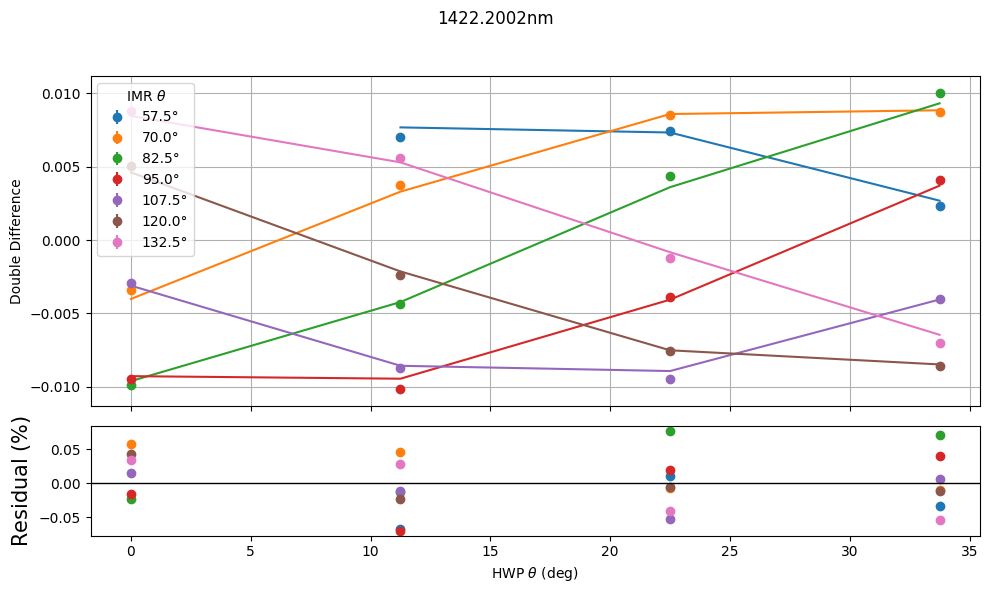

Updated Mueller Matrix:
[[ 0.50288081 -0.27399719  0.29419564 -0.29308224]
 [-0.49751615  0.27687272 -0.29740295  0.29627974]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.07003161926244295 0.07720800592882171
s_res: 0.040490447553529436
Error: [0.00240772]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.9440e-03                                    9.45e-02    
       1              2         1.4658e-03      4.78e-04       1.00e-02       9.38e-04    
       2              3         1.4657e-03      4.81e-08       1.01e-04       9.59e-08    
       3              4         1.4657e-03      5.05e-16       1.04e-08       9.35e-12    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.9440e-03, final cost 1.4657e-03, first-order optimality 9.35e-12.
     message: `gtol` termination condition is satisfied

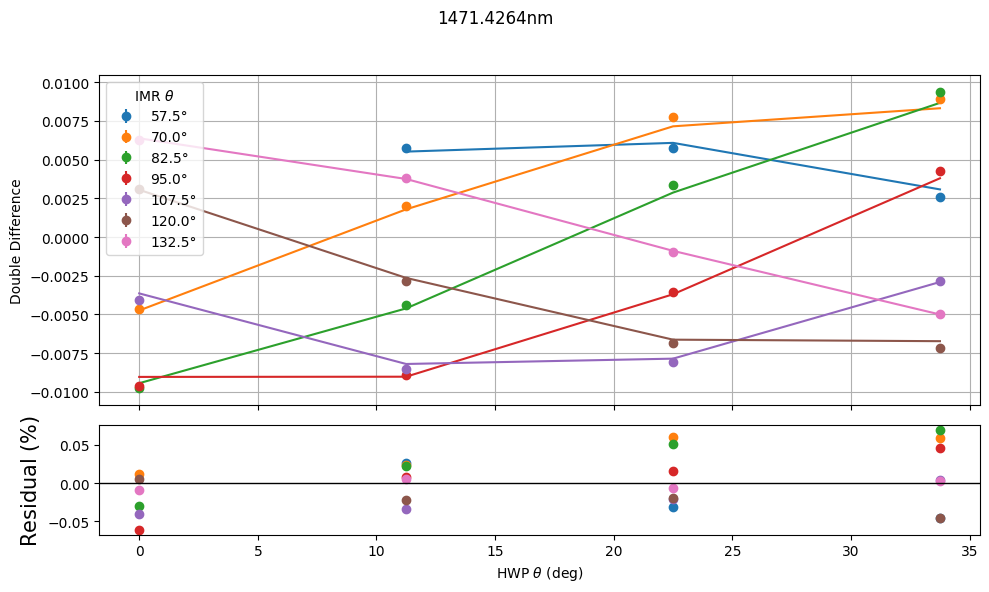

Updated Mueller Matrix:
[[ 0.50203832 -0.20153148  0.23625295 -0.38833729]
 [-0.49722815  0.20339901 -0.23855542  0.39212526]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.06097738049658619 0.0696893335456833
s_res: 0.035594661155408755
Error: [0.0024349]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2647e-03                                    8.13e-02    
       1              2         8.5615e-04      4.09e-04       9.95e-03       8.01e-04    
       2              3         8.5611e-04      4.04e-08       1.00e-04       8.13e-08    
       3              4         8.5611e-04      4.15e-16       1.01e-08       2.03e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.2647e-03, final cost 8.5611e-04, first-order optimality 2.03e-10.
     message: `gtol` termination condition is satisfied.


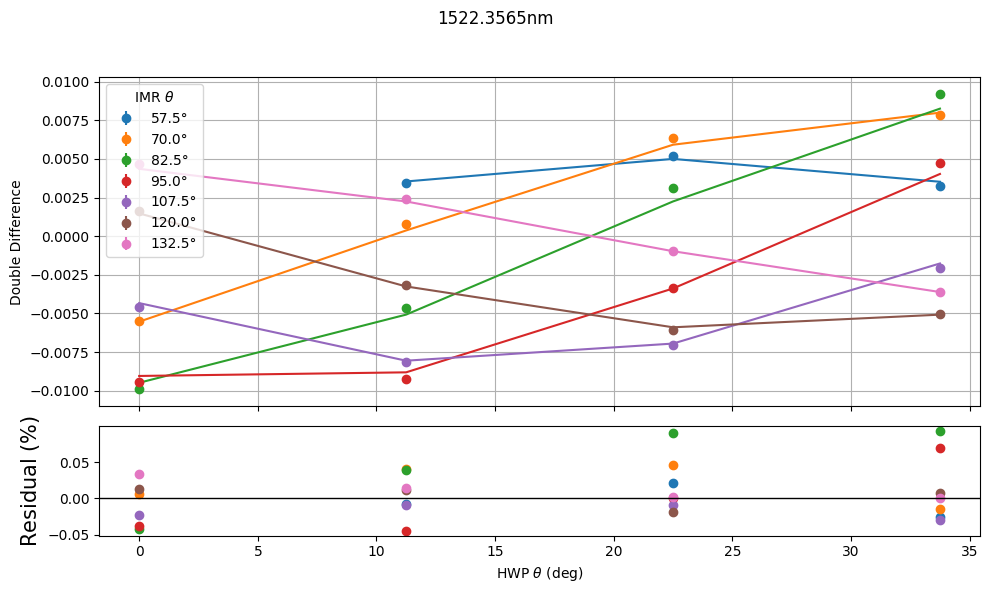

Updated Mueller Matrix:
[[ 0.50126905 -0.12787993  0.16798375 -0.44955249]
 [-0.49665765  0.12898007 -0.16954958  0.45374806]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.04434991251835774 0.09259702931472735
s_res: 0.03762153853666561
Error: [0.00199786]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.5097e-04                                    7.63e-02    
       1              2         5.6515e-05      3.94e-04       1.02e-02       7.73e-04    
       2              3         5.6474e-05      4.14e-08       1.06e-04       8.26e-08    
       3              4         5.6474e-05      4.72e-16       1.13e-08       6.39e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 4.5097e-04, final cost 5.6474e-05, first-order optimality 6.39e-11.
     message: `gtol` termination condition is satisfied.

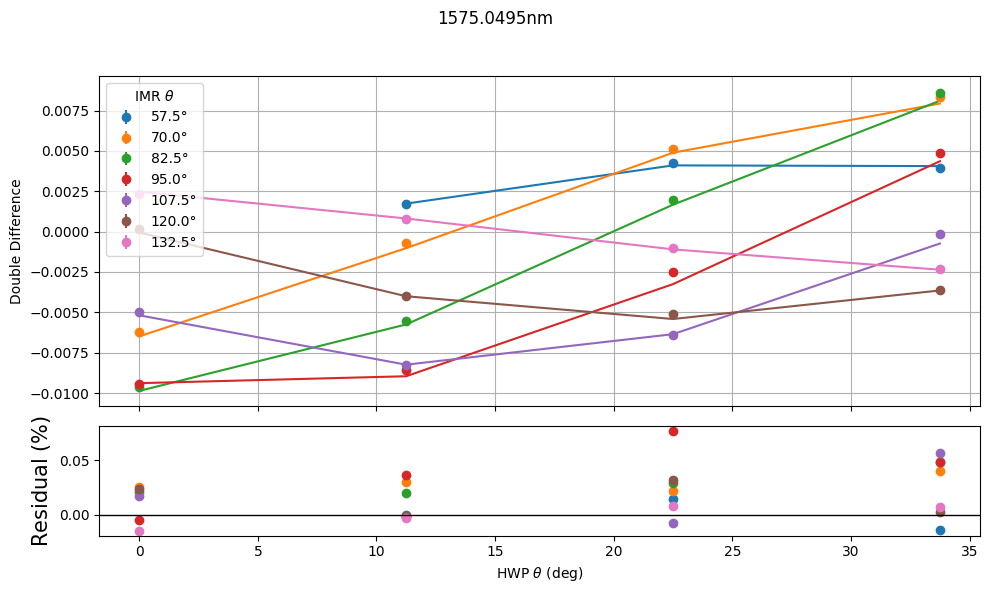

Updated Mueller Matrix:
[[ 0.50058802 -0.06003317  0.09692581 -0.48286423]
 [-0.4961411   0.06048003 -0.09779473  0.48720248]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.014745221380813717 0.07721136307058205
s_res: 0.029927206206525028
Error: [0.0005376]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.9466e-03                                    6.59e-02    
       1              2         1.6404e-03      3.06e-04       9.21e-03       6.01e-04    
       2              3         1.6404e-03      2.60e-08       8.55e-05       5.21e-08    
       3              4         1.6404e-03      1.99e-16       7.42e-09       2.40e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.9466e-03, final cost 1.6404e-03, first-order optimality 2.40e-10.
     message: `gtol` termination condition is satisfied

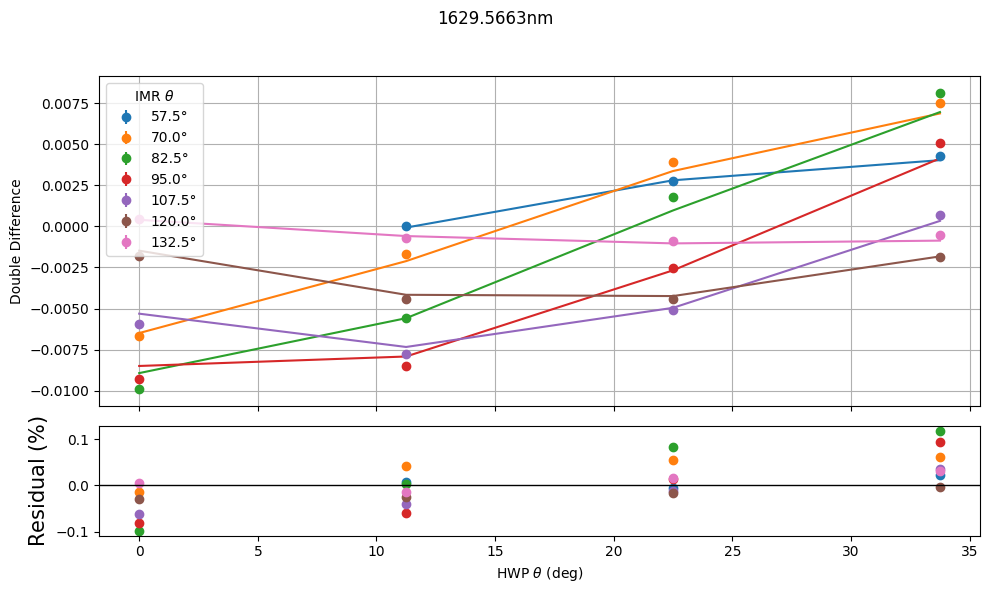

Updated Mueller Matrix:
[[ 0.49989929  0.00668522  0.02384467 -0.49409778]
 [-0.49471753 -0.00685198 -0.02409232  0.49927094]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.09788006327968568 0.11787159325864871
s_res: 0.0515448013241889
Error: [0.00295406]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.4098e-03                                    6.49e-02    
       1              2         2.1181e-03      2.92e-04       8.91e-03       5.73e-04    
       2              3         2.1181e-03      2.32e-08       8.02e-05       4.67e-08    
       3              4         2.1181e-03      1.51e-16       6.53e-09       8.66e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 2.4098e-03, final cost 2.1181e-03, first-order optimality 8.66e-11.
     message: `gtol` termination condition is satisfied.


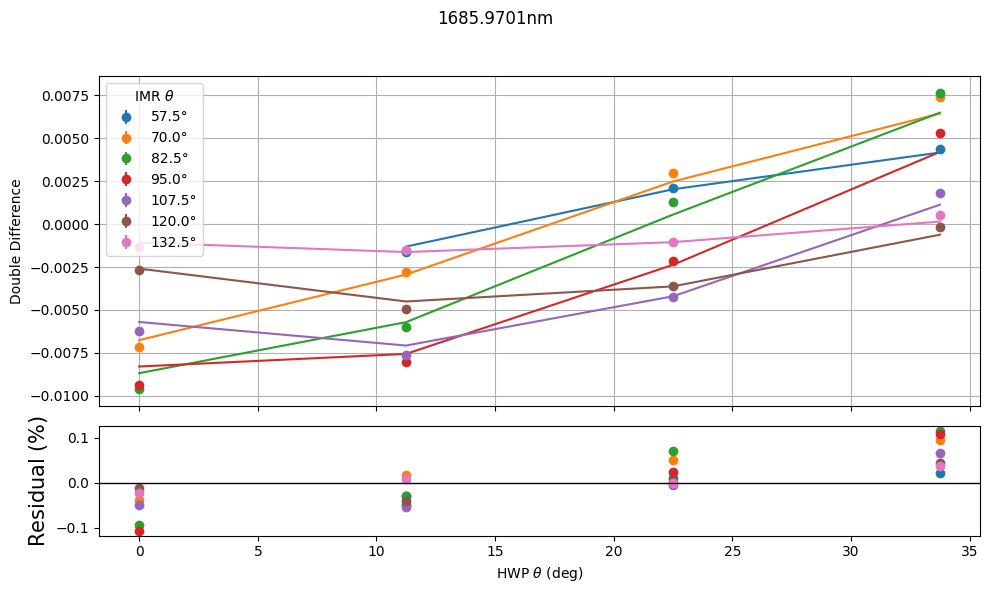

Updated Mueller Matrix:
[[ 0.49943167  0.05789731 -0.03917632 -0.4888905 ]
 [-0.49386269 -0.05864927  0.03961914  0.49439068]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.10662877210427701 0.11598846277140773
s_res: 0.057155408401212665
Error: [0.00332927]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.6111e-04                                    6.98e-02    
       1              2         1.3676e-04      3.24e-04       9.21e-03       6.37e-04    
       2              3         1.3674e-04      2.75e-08       8.56e-05       5.50e-08    
       3              4         1.3674e-04      2.05e-16       7.39e-09       3.84e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 4.6111e-04, final cost 1.3674e-04, first-order optimality 3.84e-11.
     message: `gtol` termination condition is satisfied

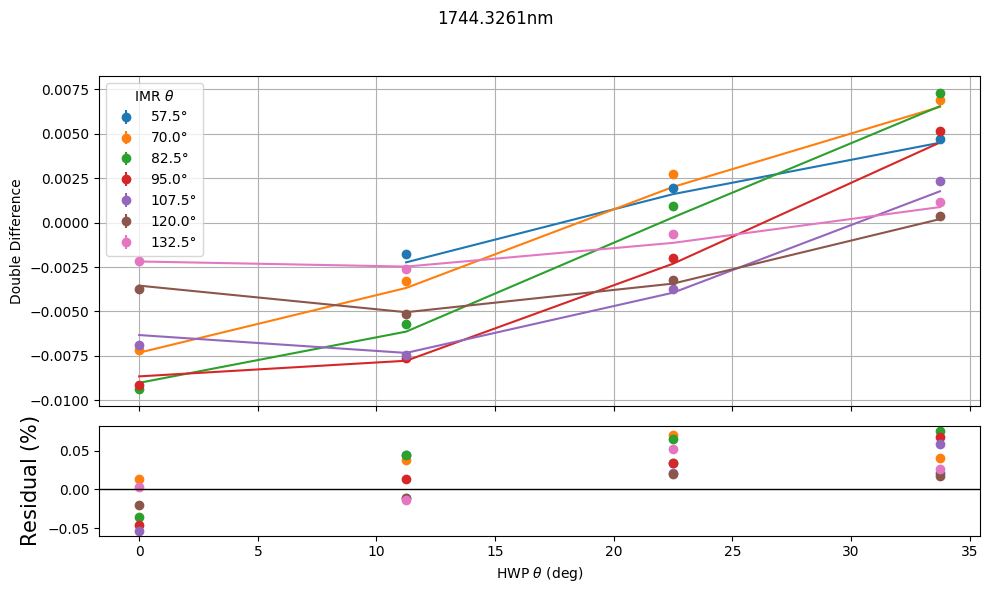

Updated Mueller Matrix:
[[ 0.4990969   0.09073479 -0.08713047 -0.4779996 ]
 [-0.49427496 -0.09170662  0.08797922  0.4826457 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.05349852312435999 0.07557341838437104
s_res: 0.041325784729881514
Error: [0.00082896]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.2290e-04                                    7.44e-02    
       1              2         1.6861e-04      3.54e-04       9.44e-03       6.95e-04    
       2              3         1.6857e-04      3.16e-08       9.00e-05       6.32e-08    
       3              4         1.6857e-04      2.61e-16       8.17e-09       2.59e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 5.2290e-04, final cost 1.6857e-04, first-order optimality 2.59e-11.
     message: `gtol` termination condition is satisfied

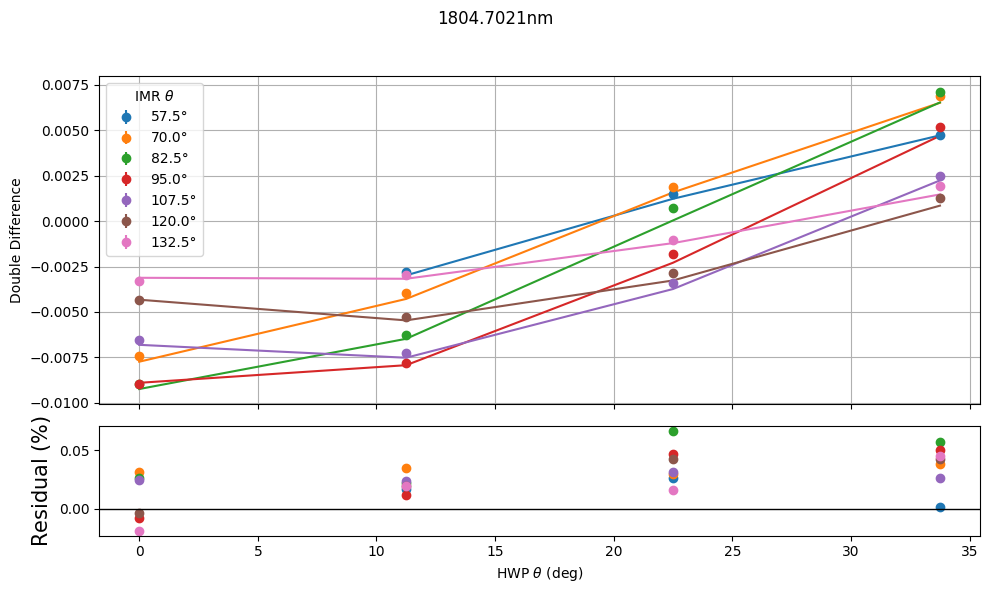

Updated Mueller Matrix:
[[ 0.49883906  0.11447489 -0.12636194 -0.46280228]
 [-0.49321123 -0.11588256  0.12779923  0.46805824]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.01878372890240665 0.0662889975904425
s_res: 0.03353386564929412
Error: [0.00090292]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.6033e-03                                    8.04e-02    
       1              2         5.2079e-03      3.95e-04       9.75e-03       7.75e-04    
       2              3         5.2078e-03      3.76e-08       9.59e-05       7.54e-08    
       3              4         5.2078e-03      3.48e-16       9.33e-09       1.71e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 5.6033e-03, final cost 5.2078e-03, first-order optimality 1.71e-11.
     message: `gtol` termination condition is satisfied.


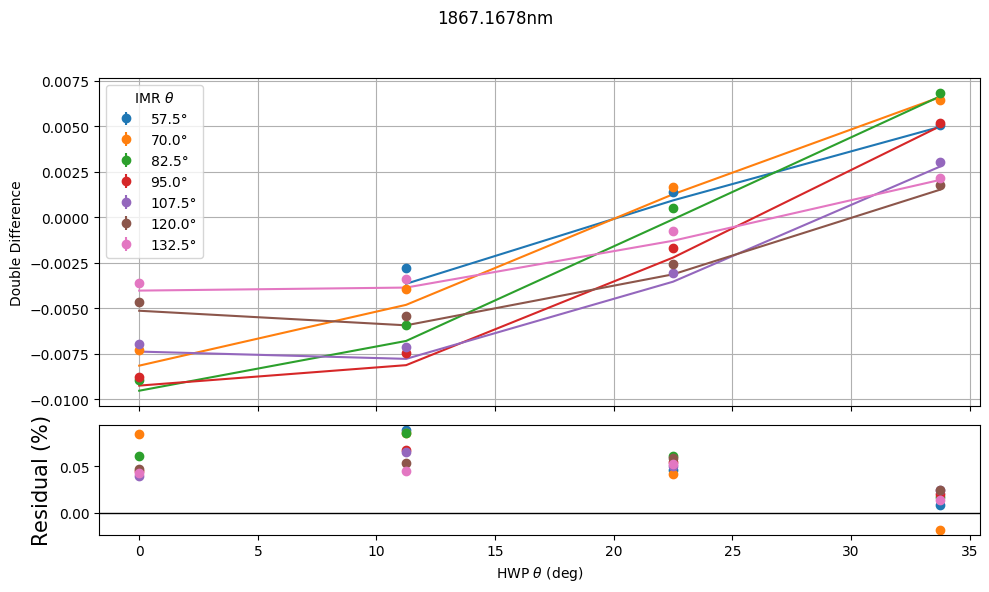

Updated Mueller Matrix:
[[ 0.49860151  0.13382834 -0.16337158 -0.44539631]
 [-0.49292766 -0.13547201  0.16524371  0.45049396]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.018192719670116708 0.08848273123768885
s_res: 0.054258566365891
Error: [0.0049064]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0289e-02                                    8.18e-02    
       1              2         9.8911e-03      3.98e-04       9.63e-03       7.80e-04    
       2              3         9.8911e-03      3.69e-08       9.37e-05       7.41e-08    
       3              4         9.8911e-03      3.14e-16       8.89e-09       6.97e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.0289e-02, final cost 9.8911e-03, first-order optimality 6.97e-10.
     message: `gtol` termination condition is satisfied.
 

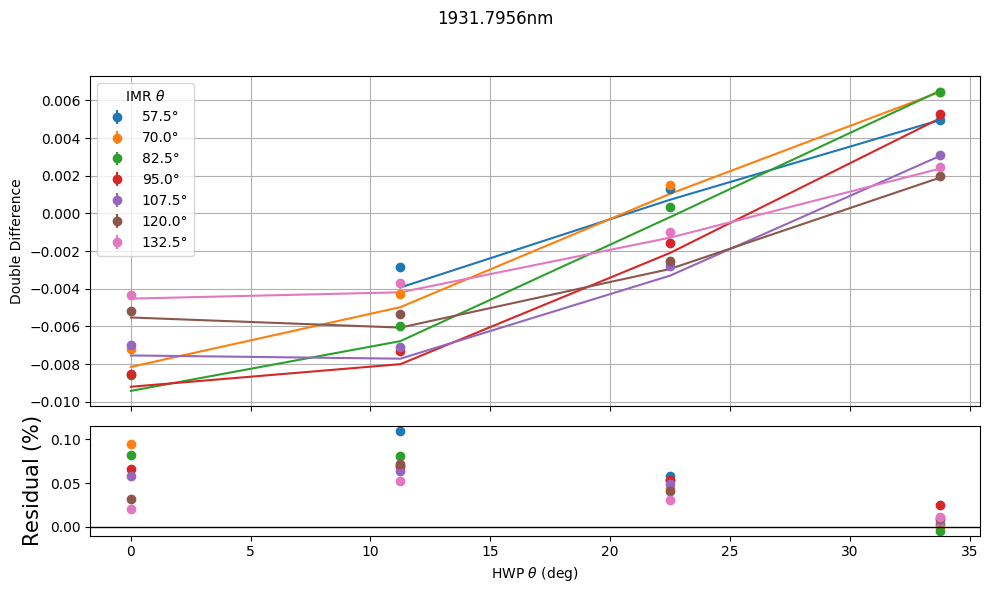

Updated Mueller Matrix:
[[ 0.49850798  0.14470239 -0.18849728 -0.43124121]
 [-0.49238041 -0.14661179  0.19083134  0.43657538]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.004309880341830774 0.10974751198826577
s_res: 0.05627104658512507
Error: [0.00666296]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2790e-02                                    8.09e-02    
       1              2         1.2410e-02      3.80e-04       9.32e-03       7.46e-04    
       2              3         1.2410e-02      3.30e-08       8.76e-05       6.60e-08    
       3              4         1.2410e-02      2.62e-16       7.75e-09       8.73e-11    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.2790e-02, final cost 1.2410e-02, first-order optimality 8.73e-11.
     message: `gtol` termination condition is satisfied

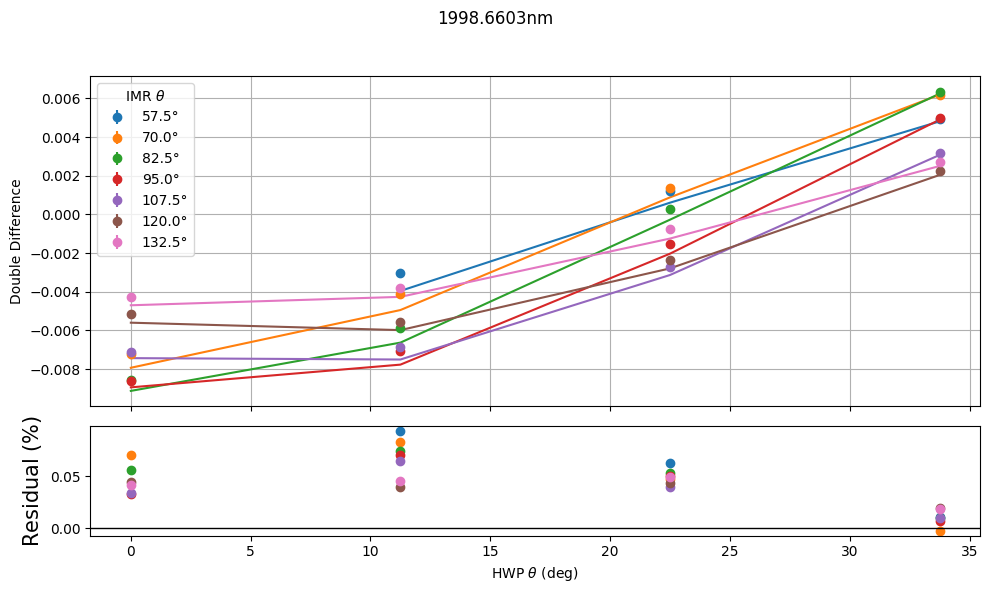

Updated Mueller Matrix:
[[ 0.49852095  0.14835709 -0.2068106  -0.42292093]
 [-0.49360123 -0.14991959  0.20886145  0.42711095]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.0026108597395488875 0.09428712810125706
s_res: 0.050765273113783045
Error: [0.00737847]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2100e-02                                    7.76e-02    
       1              2         1.1752e-02      3.47e-04       8.87e-03       6.82e-04    
       2              3         1.1752e-02      2.73e-08       7.93e-05       5.37e-08    
       3              4         1.1752e-02      1.73e-16       6.24e-09       7.57e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.2100e-02, final cost 1.1752e-02, first-order optimality 7.57e-10.
     message: `gtol` termination condition is satisfi

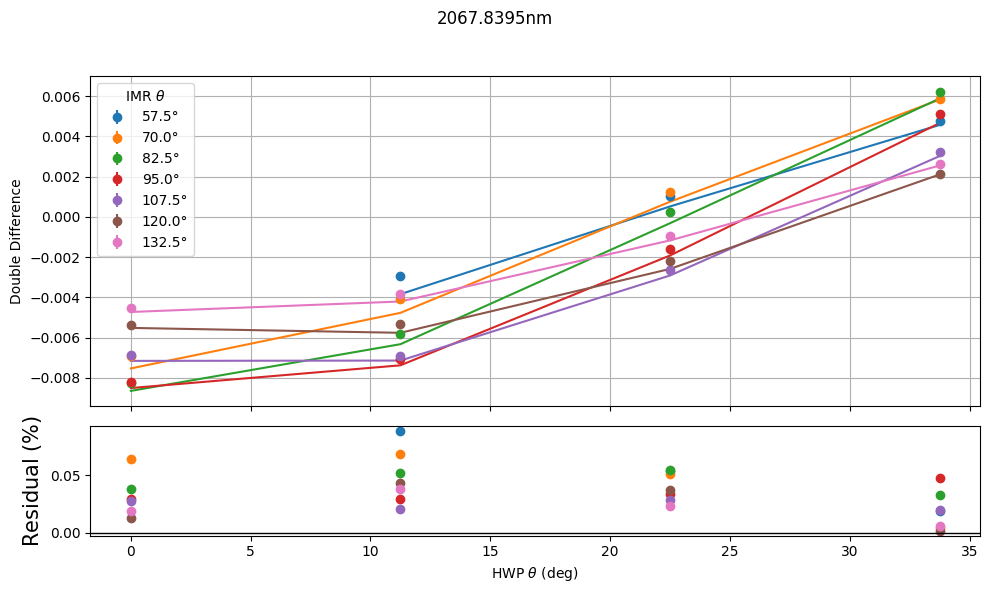

Updated Mueller Matrix:
[[ 0.49858062  0.14961098 -0.22278174 -0.41234311]
 [-0.49197716 -0.15172609  0.22575716  0.41784574]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: 0.0019709793467204417 0.08865664906069254
s_res: 0.04121172435680599
Error: [0.00714948]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3880e-02                                    7.44e-02    
       1              2         1.3564e-02      3.16e-04       8.43e-03       6.21e-04    
       2              3         1.3564e-02      2.24e-08       7.16e-05       4.55e-08    
       3              4         1.3564e-02      1.18e-16       5.25e-09       3.79e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.3880e-02, final cost 1.3564e-02, first-order optimality 3.79e-10.
     message: `gtol` termination condition is satisfied

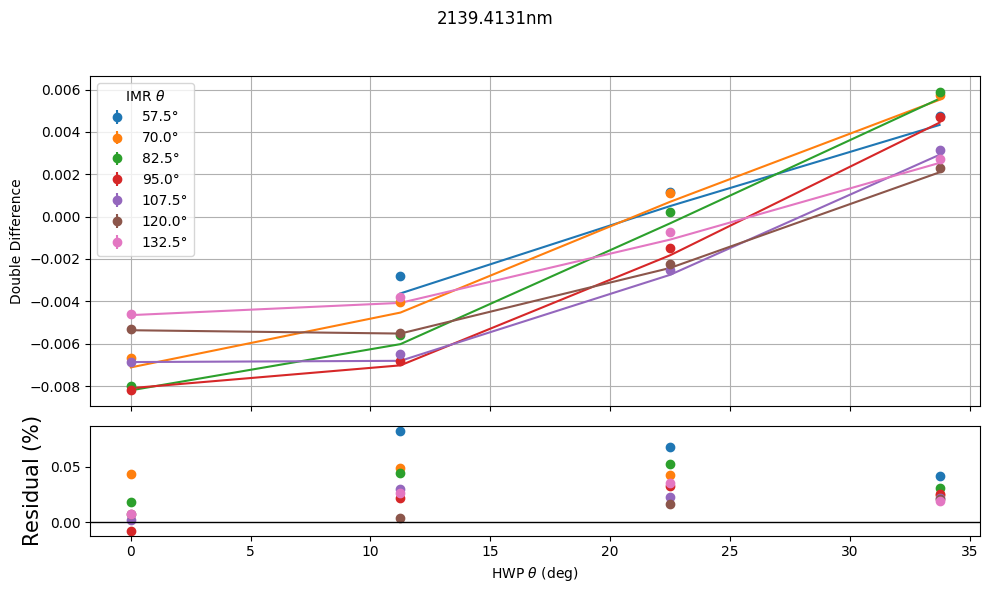

Updated Mueller Matrix:
[[ 0.49867307  0.14703164 -0.23608047 -0.40636426]
 [-0.49242644 -0.14899328  0.23906129  0.41149134]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.0075601268732961024 0.08245400100102745
s_res: 0.03571701463841471
Error: [0.00764868]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5371e-02                                    7.06e-02    
       1              2         1.5083e-02      2.88e-04       8.09e-03       5.67e-04    
       2              3         1.5083e-02      1.89e-08       6.60e-05       3.71e-08    
       3              4         1.5083e-02      7.81e-17       4.32e-09       1.12e-09    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.5371e-02, final cost 1.5083e-02, first-order optimality 1.12e-09.
     message: `gtol` termination condition is satisfie

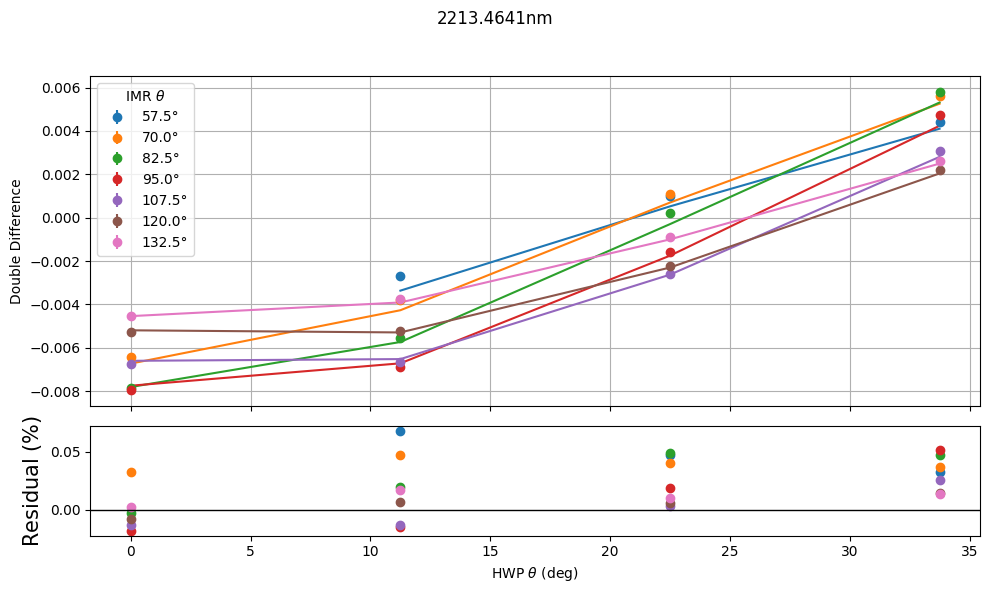

Updated Mueller Matrix:
[[ 0.49877961  0.14043973 -0.24556489 -0.39966799]
 [-0.48965231 -0.14319441  0.25012249  0.40708065]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.01817444408966884 0.0679139636913102
s_res: 0.030762318579378868
Error: [0.00810938]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4777e-02                                    6.58e-02    
       1              2         1.4522e-02      2.55e-04       7.70e-03       5.03e-04    
       2              3         1.4522e-02      1.51e-08       5.97e-05       2.99e-08    
       3              4         1.4522e-02      5.55e-17       3.55e-09       6.23e-10    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.4777e-02, final cost 1.4522e-02, first-order optimality 6.23e-10.
     message: `gtol` termination condition is satisfied.

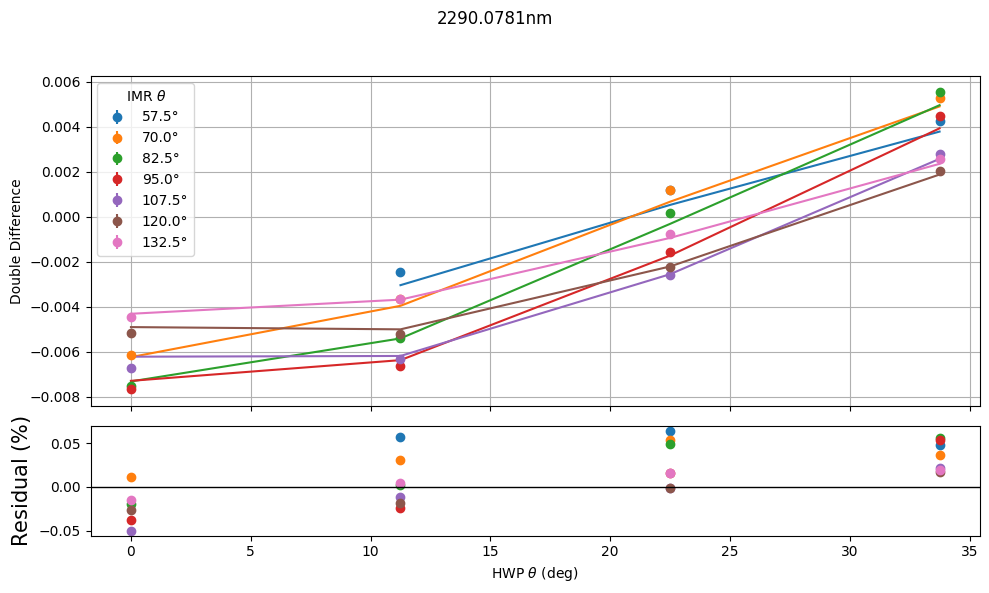

Updated Mueller Matrix:
[[ 0.49893621  0.12806579 -0.25467915 -0.39384366]
 [-0.48618355 -0.13161006  0.26133405  0.40412863]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.050159765708565174 0.0642124451118117
s_res: 0.03475889082137788
Error: [0.00803535]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6596e-02                                    5.95e-02    
       1              2         1.6376e-02      2.20e-04       7.33e-03       4.34e-04    
       2              3         1.6376e-02      1.18e-08       5.42e-05       2.48e-08    
       3              4         1.6376e-02      4.16e-17       3.10e-09       1.00e-09    
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.6596e-02, final cost 1.6376e-02, first-order optimality 1.00e-09.
     message: `gtol` termination condition is satisfied.

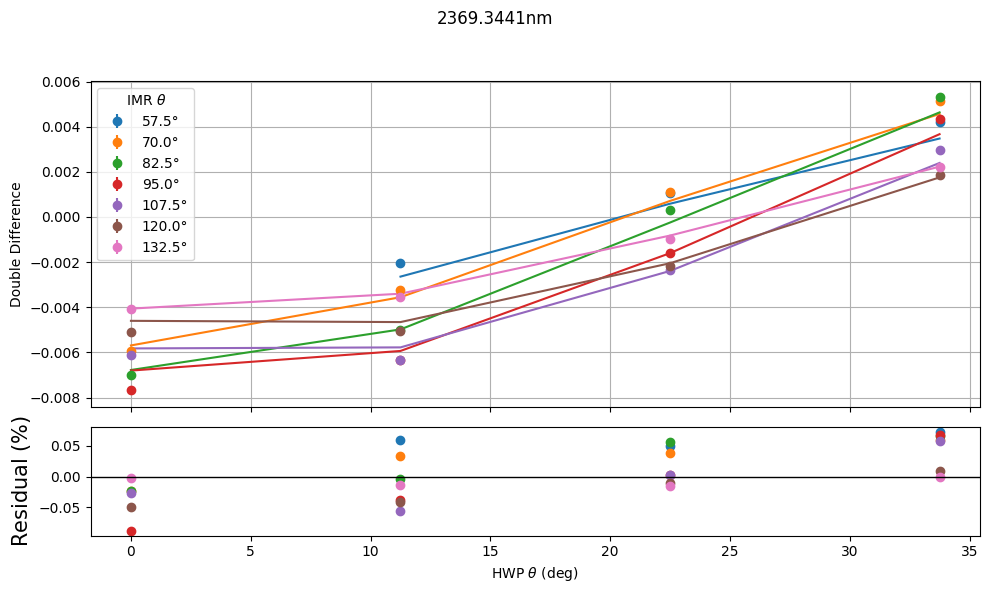

Updated Mueller Matrix:
[[ 0.49908285  0.1151203  -0.25881763 -0.3815021 ]
 [-0.47516515 -0.12125365  0.27180147  0.40062954]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
108 54
Residuals range: -0.08813367557897356 0.07264553098876037
s_res: 0.04472184233645436
Error: [0.00875659]


In [1]:
# Fit all 22 wavelength bins
from pyPolCal.instruments import fit_CHARIS_Mueller_matrix_by_bin_nbs_unpol
from pathlib import Path
errors = []
sres_list = []
for bin in range(0,22):
    error,fig,ax,sres = fit_CHARIS_Mueller_matrix_by_bin_nbs_unpol(
        f'../datacsvs/nbs_in_internalcal_unpol_no_45_derotator/bin{bin}.csv',bin,
        Path(f'../system_dictionaries/nbs_in_unpol_internalcal/bin{bin}.json'),
    )
    errors.append(error)
    sres_list.append(sres)



In [5]:
# find average error
import numpy as np
errors = np.array(errors)
print('eps', np.mean(errors[:,0]))



eps 0.004579762158194772


Text(0.5, 1.0, 'Polarimetric Accuracy')

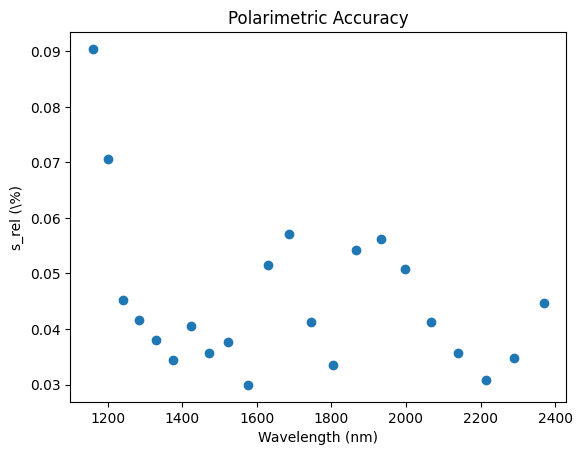

In [2]:
# plot pol accuracy
import matplotlib.pyplot as plt
from pyPolCal.constants import wavelength_bins
plt.scatter(wavelength_bins,sres_list)
plt.xlabel('Wavelength (nm)')
plt.ylabel('s_rel (\%)')
plt.title('Polarimetric Accuracy')

`model_data` will list out all of your fits in a data frame.

In [3]:
from pyPolCal.csv_tools import model_data
json_dir = '../system_dictionaries/nbs_in_unpol_internalcal'
df = model_data(json_dir, offsets=False)
df

,wavelength_bin,lp_epsilon
0,1159.5614,0.012059
1,1199.6971,0.011862
2,1241.2219,0.011799
3,1284.1840,0.011366
4,1328.6331,0.010887
5,1374.6208,0.010629
6,1422.2002,0.010485
7,1471.4264,0.010126
8,1522.3565,0.010049
9,1575.0495,0.010344


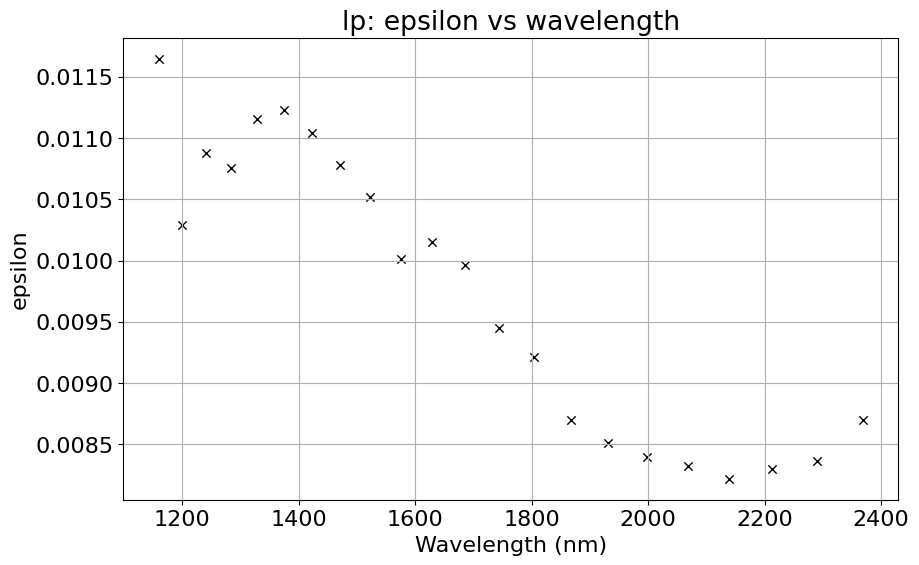

In [8]:
from pyPolCal.plotting import plot_config_dict_vs_wavelength
params, fig, ax = plot_config_dict_vs_wavelength('lp', 'epsilon', json_dir)
#fig, ax = plt.subplots(figsize=(10,6))
#ax.scatter(wavelength_bins, np.rad2deg(params))
#ax.plot(wavelength_bins,np.rad2deg((IMR_retardance(wavelength_bins,264.14673))), label='IMR Retardance Model', color='black', linestyle='--')